In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('dark_background')

In [12]:
x = np.linspace(-5, 5, 100)

#Prior Distribution
def prior(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)

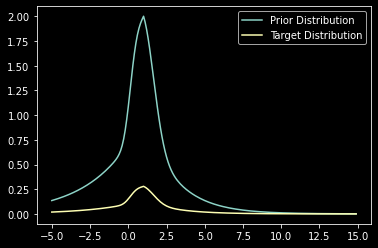

In [13]:
x = np.arange(-5,15,0.1)
f = np.array([prior(i) for i in x])
g = f / 7.16556

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, f, label='Prior Distribution')
ax.plot(x, g, label='Target Distribution')
ax.legend()
plt.show()

In [14]:
def metropolis_hastings(iter):
    num_accepted = 0
    samples = [3.14]
    scale_norm = 1.5

    for i in range(iter):
        # sample a candidate from a normal distribution
        candidate = np.random.normal(loc=samples[-1], scale=scale_norm)

        # calculate a1 as P(candidate) / P(xt)
        a1 = prior(candidate) / prior(samples[-1])

        # calculate a2 as g(candidate|xt) / g(xt|candidate)
        a2 = norm.pdf(candidate, loc=samples[-1], scale=scale_norm) / norm.pdf(samples[-1], loc=candidate, scale=scale_norm)

        # calculate a as the multiplication of the previous two results
        a = a1 * a2

        # accept or reject
        if a >= 1:
            samples.append(candidate)
            num_accepted += 1
        elif np.random.random() < a:
            samples.append(candidate)
            num_accepted += 1
        else:
            samples.append(samples[-1])
    
    return samples, num_accepted

In [15]:
iterations = 10000
samples_mcmc, num_accepted_mcmc = metropolis_hastings(iterations)
print(f'Accepted: {num_accepted_mcmc}\nAcceptance rate: {num_accepted_mcmc/(iterations-1)*100:.2f}%')

Accepted: 7203
Acceptance rate: 72.04%


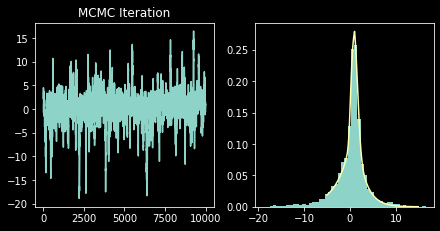

In [16]:
# Plots
cm = 1/2.54

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15.9*cm, 8*cm))
fig.tight_layout()

# Plot A
axes[0].plot(samples_mcmc)
axes[0].set_title('MCMC Iteration')

# Plot B
axes[1].hist(samples_mcmc, bins=50, density=1)
axes[1].plot(x, g)
#axes[1].plot(x, f)
plt.show()

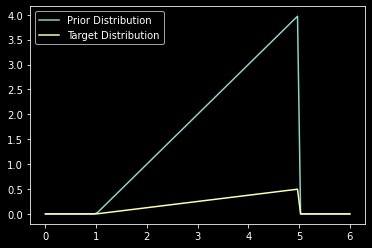

In [17]:
x = np.linspace(0, 6, 100)

#Target Distribution
def prior(x):
    if x >= 1 and x <= 5:
        return 1*x - 1
    else: 
        return 0

f = np.array([prior(i) for i in x])
g = f / 8

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, f, label='Prior Distribution')
ax.plot(x, g, label='Target Distribution')
ax.legend()
plt.show()

In [18]:
iterations = 10000
samples_mcmc, num_accepted_mcmc = metropolis_hastings(iterations)
print(f'Accepted: {num_accepted_mcmc}\nAcceptance rate: {num_accepted_mcmc/(iterations-1)*100:.2f}%')

Accepted: 5464
Acceptance rate: 54.65%


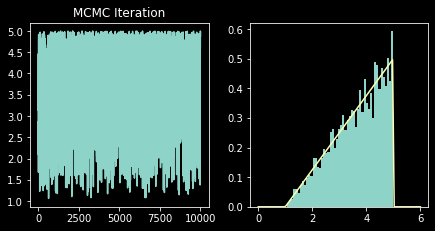

In [19]:
# Plots
cm = 1/2.54

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15.9*cm, 8*cm))
fig.tight_layout()

# Plot A
axes[0].plot(samples_mcmc)
axes[0].set_title('MCMC Iteration')

# Plot B
axes[1].hist(samples_mcmc, bins=50, density=1)
axes[1].plot(x, g)
#axes[1].plot(x, f)
plt.show()